In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import colors

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
plt.rcParams['axes.linewidth'] = 0.5

In [2]:
repre = pd.read_csv(f'{Project}/Results/Tables/conversion_tables/representative-isoforms.txt', sep='\t', usecols=[0,1], header=None, names=['gene_id','transcript_id'])
display(repre)

full_name = pd.read_csv('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GSEA/chip/Mouse_Ensembl_Gene_ID_MSigDB.v2022.1.Mm.chip', sep='\t')
full_name = full_name.rename(columns={'Probe Set ID':'gene_id', 'Gene Symbol':'gene_name', 'Gene Title':'full_name'})
full_name['full_name'] = full_name['full_name'].str.split('[').str[0]

display(full_name)

,gene_id,transcript_id
0,ENSMUSG00000000001.5,ENSMUST00000000001.5
1,ENSMUSG00000000003.16,ENSMUST00000000003.14
2,ENSMUSG00000000028.16,ENSMUST00000000028.14
3,ENSMUSG00000000031.17,ENSMUST00000136359.8
4,ENSMUSG00000000037.18,ENSMUST00000019101.11
...,...,...
55354,ENSMUSG00002076988.1,ENSMUST00020182589.1
55355,ENSMUSG00002076989.1,ENSMUST00000083836.4
55356,ENSMUSG00002076990.1,ENSMUST00020183326.1
55357,ENSMUSG00002076991.1,ENSMUST00020182837.1


,gene_id,gene_name,full_name
0,ENSMUSG00000000001,Gnai3,guanine nucleotide binding protein (G protein)...
1,ENSMUSG00000000003,Pbsn,probasin
2,ENSMUSG00000000028,Cdc45,cell division cycle 45
3,ENSMUSG00000000031,H19,"H19, imprinted maternally expressed transcript"
4,ENSMUSG00000000037,Scml2,Scm polycomb group protein like 2
...,...,...,...
43242,ENSMUSG00002076818,SNORD14,Small nucleolar RNA SNORD14
43243,ENSMUSG00002076971,Snord100,"small nucleolar RNA, C/D box 100"
43244,ENSMUSG00002076975,Gm23823,"predicted gene, 23823"
43245,ENSMUSG00002076989,Gm23510,"predicted gene, 23510"


In [3]:
RNA_logFC = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')
RNA_logFC['gene_id'] = RNA_logFC['gene_id'].str.split('.').str[0]

PT_logFC = pd.read_csv(f'{Project}/Results/Tables/Proteome/PT_Norm_FC_calculation/v20230104/adi_PT_avg_log2FC.tsv', sep='\t')
PT_conv = pd.read_csv(f'{Project}/Results/Tables/Proteome/adi_proteome_logExp_geneid.tsv', sep='\t', usecols=('uniprot_id','gene_id')).drop_duplicates(subset='gene_id')
PT_logFC = pd.merge(PT_conv, PT_logFC, on='uniprot_id').drop(columns='uniprot_id')

FC = pd.merge(RNA_logFC, PT_logFC, on='gene_id')
display(FC)

,gene_id,R4,R8,PT4,PT8
0,ENSMUSG00000033845,1.919982,2.397623,0.974294,0.987729
1,ENSMUSG00000025903,0.564052,0.894128,0.255831,0.685794
2,ENSMUSG00000033813,-0.823592,0.210519,-0.406827,-0.486495
3,ENSMUSG00000033793,0.192070,-0.043765,0.561826,0.770738
4,ENSMUSG00000025907,-0.130110,0.328257,-0.272296,-0.053266
...,...,...,...,...,...
4782,ENSMUSG00000064354,3.052747,3.297602,0.652338,0.828213
4783,ENSMUSG00000064356,4.596706,3.115628,1.143173,1.540505
4784,ENSMUSG00000064363,1.677543,2.216408,0.906188,1.245071
4785,ENSMUSG00000064367,1.287624,1.643277,0.815390,1.175141


In [4]:
stalling_change_all = pd.read_csv(f'{Project}/Results/Tables/Ribosome_stalling/v20230730/adi_stalling-change_FEresult.tsv', sep='\t')
display(stalling_change_all)

stalling_estimated_genes = stalling_change_all[['transcript_id']].drop_duplicates()
stalling_estimated_genes = pd.merge(repre, stalling_estimated_genes, on='transcript_id')
stalling_estimated_genes['gene_id'] = stalling_estimated_genes['gene_id'].str.split('.').str[0]
display(stalling_estimated_genes)

,transcript_id,reltostart-asite,D4_OR,D4_p,D4_FDR,D8_OR,D8_p,D8_FDR
0,ENSMUST00000000001.5,33,0.308259,0.356685,1.0,0.774119,1.000000,1.0
1,ENSMUST00000000001.5,36,0.926156,1.000000,1.0,1.161905,1.000000,1.0
2,ENSMUST00000000001.5,39,0.000000,0.231122,1.0,1.744579,0.667567,1.0
3,ENSMUST00000000001.5,42,inf,0.500555,1.0,NaN,1.000000,1.0
4,ENSMUST00000000001.5,45,0.462733,0.611056,1.0,0.580519,1.000000,1.0
...,...,...,...,...,...,...,...,...
2238001,ENSMUST00000239525.1,10461,0.000000,1.000000,1.0,0.000000,1.000000,1.0
2238002,ENSMUST00000239525.1,10464,1.561936,1.000000,1.0,0.000000,1.000000,1.0
2238003,ENSMUST00000239525.1,10467,0.520467,0.494876,1.0,0.000000,0.598884,1.0
2238004,ENSMUST00000239525.1,10470,0.669209,0.749590,1.0,0.767953,1.000000,1.0


,gene_id,transcript_id
0,ENSMUSG00000000001,ENSMUST00000000001.5
1,ENSMUSG00000000056,ENSMUST00000103015.4
2,ENSMUSG00000000078,ENSMUST00000000080.8
3,ENSMUSG00000000088,ENSMUST00000000090.8
4,ENSMUSG00000000127,ENSMUST00000000129.14
...,...,...
5019,ENSMUSG00000118491,ENSMUST00000142247.8
5020,ENSMUSG00000118552,ENSMUST00000238938.2
5021,ENSMUSG00000118653,ENSMUST00000239472.2
5022,ENSMUSG00000118664,ENSMUST00000239509.1


In [5]:
codon_data = pd.read_csv(f'{Project}/Results/Tables/Codon_analysis/codon_usage/v20220503/gene-level_codon_usage.tsv', sep='\t')
codon_data = codon_data.rename(columns={'Transcript_ID':'transcript_id', 'Gene_ID':'gene_id', 'Gene_name':'gene_name'})
codon_data['Total_codon_num'] = codon_data.iloc[:,5:].sum(axis=1)
codon_data = pd.merge(repre, codon_data, on=['transcript_id','gene_id'])

for codon in codon_data.iloc[:,5:-1]:
    codon_data[codon] = codon_data[codon] / codon_data['Total_codon_num'] * 100

# display(codon_data)

codontab = {
    'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
    'TTC': 'F', 'TTT': 'F',
    'TTA': 'L', 'TTG': 'L', 'CTA': 'L', 'CTC': 'L', 'CTG': 'L','CTT': 'L',
    'TAC': 'Y', 'TAT': 'Y',
    # 'TAA': '*', 'TAG': '*', 'TGA': '*',
    'TGC': 'C', 'TGT': 'C',
    'TGG': 'W',
    'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
    'CAC': 'H', 'CAT': 'H',
    'CAA': 'Q', 'CAG': 'Q',
    'CGA': 'R', 'CGC': 'R', 'CGG': 'R','CGT': 'R', 'AGA': 'R', 'AGG': 'R',
    'ATA': 'I', 'ATC': 'I', 'ATT': 'I',
    'ATG': 'M',
    'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
    'AAC': 'N', 'AAT': 'N',
    'AAA': 'K', 'AAG': 'K',
    'AGC': 'S', 'AGT': 'S',
    'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
    'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
    'GAC': 'D', 'GAT': 'D',
    'GAA': 'E', 'GAG': 'E',
    'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G'
}

AAs = []
codons = []
for codon, AA in codontab.items():
    AAs.append(AA)
    codons.append(codon.replace('T','U'))

AA_codon = pd.DataFrame({'AA':AAs, 'codon':codons})
AA2codon = AA_codon.groupby('AA')['codon'].apply(list).to_dict()
# display(AA2codon)

AA_ratio_data = codon_data[['transcript_id','gene_id','gene_name','Total_codon_num']].copy()
for AA in AA2codon:
    AA_ratio_data[AA] = codon_data[AA2codon[AA]].sum(axis=1)

AA_ratio_data['gene_id'] = AA_ratio_data['gene_id'].str.split('.').str[0]
display(AA_ratio_data)

AA_ratio_data_BG = pd.merge(stalling_estimated_genes[['gene_id']], AA_ratio_data, on='gene_id')
display(AA_ratio_data_BG)

,transcript_id,gene_id,gene_name,Total_codon_num,A,C,D,E,F,G,...,M,N,P,Q,R,S,T,V,W,Y
0,ENSMUST00000000001.5,ENSMUSG00000000001,Gnai3,355,6.760563,2.816901,7.042254,8.450704,4.788732,5.352113,...,2.253521,3.943662,0.845070,3.661972,5.633803,6.197183,6.478873,6.197183,0.845070,4.225352
1,ENSMUST00000000003.14,ENSMUSG00000000003,Pbsn,175,3.428571,2.285714,2.285714,7.428571,4.000000,5.714286,...,5.142857,5.714286,2.285714,4.000000,5.714286,4.000000,4.571429,7.428571,0.571429,5.142857
2,ENSMUST00000000028.14,ENSMUSG00000000028,Cdc45,567,5.467372,1.940035,7.760141,7.231041,5.467372,3.527337,...,2.821869,3.350970,2.469136,4.938272,5.291005,8.465608,5.114638,7.054674,1.410935,3.350970
3,ENSMUST00000019101.11,ENSMUSG00000000037,Scml2,906,7.395143,1.545254,6.512141,5.849890,4.304636,8.057395,...,0.883002,2.649007,8.830022,4.194260,6.622517,7.174393,8.498896,5.077263,1.766004,0.662252
4,ENSMUST00000000049.6,ENSMUSG00000000049,Apoh,346,5.491329,6.647399,3.468208,5.780347,5.491329,6.358382,...,2.023121,3.757225,9.826590,1.734104,4.046243,5.780347,6.936416,6.069364,1.445087,4.046243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21929,ENSMUST00000239545.1,ENSMUSG00000118670,Muc19,7525,19.933555,1.794020,1.235880,2.923588,0.611296,9.581395,...,0.225914,2.019934,5.940199,1.116279,2.232558,22.019934,22.325581,2.790698,0.199336,0.823920
21930,ENSMUST00000239552.1,ENSMUSG00000118671,Eppk1,3459,7.950275,0.896213,5.174906,7.776814,2.428448,8.123735,...,1.850246,1.618965,4.394334,6.620411,6.909511,6.042209,6.909511,7.805724,0.780572,2.515178
21931,ENSMUST00000239554.1,ENSMUSG00000118672,Muc4,3991,4.535204,1.202706,2.630920,3.081934,1.929341,4.585317,...,2.129792,3.583062,6.740165,6.940616,3.257329,18.892508,20.370834,3.958908,0.676522,1.353044
21932,ENSMUST00010126032.3,ENSMUSG00001074846,Iqcf3,204,8.823529,1.960784,5.392157,16.176471,0.490196,2.450980,...,0.980392,4.411765,3.431373,8.823529,6.372549,4.901961,5.392157,3.921569,2.450980,0.490196


,gene_id,transcript_id,gene_name,Total_codon_num,A,C,D,E,F,G,...,M,N,P,Q,R,S,T,V,W,Y
0,ENSMUSG00000000001,ENSMUST00000000001.5,Gnai3,355,6.760563,2.816901,7.042254,8.450704,4.788732,5.352113,...,2.253521,3.943662,0.845070,3.661972,5.633803,6.197183,6.478873,6.197183,0.845070,4.225352
1,ENSMUSG00000000056,ENSMUST00000103015.4,Narf,463,6.911447,3.455724,5.615551,8.207343,3.887689,6.047516,...,1.295896,2.375810,3.887689,5.615551,5.183585,7.775378,4.751620,7.775378,0.647948,2.807775
2,ENSMUSG00000000078,ENSMUST00000000080.8,Klf6,319,3.134796,4.075235,5.642633,8.150470,4.075235,5.956113,...,0.940439,2.821317,7.210031,2.821317,6.269592,15.673981,5.015674,3.761755,1.567398,2.194357
3,ENSMUSG00000000088,ENSMUST00000000090.8,Cox5a,147,14.285714,2.721088,6.122449,7.482993,2.040816,4.761905,...,0.680272,2.721088,6.802721,0.680272,7.482993,4.761905,4.081633,6.122449,1.360544,3.401361
4,ENSMUSG00000000127,ENSMUST00000000129.14,Fer,824,4.854369,1.456311,4.611650,9.466019,2.791262,4.733010,...,2.912621,4.126214,3.155340,6.796117,3.762136,6.432039,4.975728,6.432039,1.092233,3.276699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,ENSMUSG00000118491,ENSMUST00000142247.8,Gm44505,530,9.056604,2.830189,4.905660,11.320755,1.320755,5.471698,...,0.943396,1.698113,8.301887,3.962264,8.867925,8.113208,4.716981,3.396226,0.377358,2.075472
5013,ENSMUSG00000118552,ENSMUST00000238938.2,Rplp2-ps1,116,17.241379,0.000000,8.620690,8.620690,1.724138,11.206897,...,0.862069,3.448276,4.310345,0.862069,1.724138,10.344828,0.000000,6.896552,0.000000,1.724138
5014,ENSMUSG00000118653,ENSMUST00000239472.2,RP23-180C14.7,224,9.821429,1.339286,4.464286,8.035714,2.232143,8.482143,...,1.339286,4.464286,7.589286,0.892857,5.357143,4.910714,5.357143,4.464286,0.446429,2.232143
5015,ENSMUSG00000118664,ENSMUST00000239509.1,Tusc3,349,7.736390,1.719198,3.151862,3.438395,6.590258,6.876791,...,3.438395,4.871060,4.297994,4.871060,7.736390,7.449857,3.151862,5.730659,1.432665,3.724928


In [6]:
stabl = pd.read_csv(f'{Project}/Results/Tables/Intron_RNA_change/REMBRANDTS/out/v20230815/stability.filtered.mx.txt', sep='\t').rename(columns={'GeneID':'gene_id'})
# display(stabl)

stabl['D0'] = stabl[['D0a','D0b','D0c']].mean(axis=1)
for SP in [Day+rep for Day in ['D0','D4','D8'] for rep in ['a','b','c']]:
    stabl[SP] = stabl[SP] - stabl['D0']
stabl = stabl.drop(columns='D0')
# display(stabl)

avg_stabl = stabl[['gene_id']].copy()
for Day in ['D0','D4','D8']:
    avg_stabl[Day] = stabl[[Day+rep for rep in ['a','b','c']]].mean(axis=1)
avg_stabl = avg_stabl[['gene_id','D4','D8']].rename(columns={'D4':'S4', 'D8':'S8'})
display(avg_stabl)

,gene_id,S4,S8
0,ENSMUSG00000000058,0.288815,0.912689
1,ENSMUSG00000000088,-0.229405,0.344774
2,ENSMUSG00000000131,-0.188012,-0.242323
3,ENSMUSG00000000134,-0.125844,-0.209755
4,ENSMUSG00000000148,-0.192310,-0.475821
...,...,...,...
4638,ENSMUSG00000118346,0.418344,0.606414
4639,ENSMUSG00000121301,-0.349892,-0.462991
4640,ENSMUSG00000121493,0.186162,0.011664
4641,ENSMUSG00000121504,-0.533011,-0.266911


----
# day 8

In [7]:
day = '8'

In [8]:
stalling_change = pd.read_csv(f'{Project}/Results/Tables/Ribosome_stalling/v20230730/adi_stalling-change_FEresult_sig.tsv', sep='\t')
stalling_change = pd.merge(repre, stalling_change, on='transcript_id', how='right').sort_values(f'D{day}_FDR')
# stalling_change = stalling_change[stalling_change['aa-asite']=='E']
stalling_change = stalling_change[stalling_change[f'D{day}_FDR']<0.01]
stalling_change = stalling_change[stalling_change[f'D{day}_OR']>1]
# stalling_change['D8_log2OR'] = np.log2(stalling_change['D8_OR'])
stalling_change['gene_id'] = stalling_change['gene_id'].str.split('.').str[0]

display(stalling_change)

,gene_id,transcript_id,asite,reltostart-asite,codon-asite,aa-asite,D4_OR,D4_p,D4_FDR,D8_OR,D8_p,D8_FDR
23191,ENSMUSG00000026043,ENSMUST00000087883.13,3312,3102,GAA,E,1.803037,9.700806e-139,4.669321e-136,2.950872,0.000000,0.000000
1275,ENSMUSG00000001506,ENSMUST00000001547.8,1684,1539,GAA,E,1.458798,2.121448e-122,3.040035e-120,2.563152,0.000000,0.000000
1985,ENSMUSG00000001506,ENSMUST00000001547.8,4396,4251,UAC,Y,2.043079,4.208669e-79,3.547660e-77,5.968501,0.000000,0.000000
22993,ENSMUSG00000026043,ENSMUST00000087883.13,2547,2337,GAA,E,1.955971,1.695743e-96,3.060816e-94,4.260758,0.000000,0.000000
917,ENSMUSG00000001506,ENSMUST00000001547.8,226,81,GAA,E,3.045111,1.525542e-234,5.465254e-232,10.141205,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2208,ENSMUSG00000002957,ENSMUST00000003038.12,1159,972,UUG,L,2.130350,1.072801e-03,4.924158e-01,2.600783,0.000022,0.009951
13798,ENSMUSG00000031812,ENSMUST00000034270.17,368,204,CGG,R,2.531474,3.353894e-05,3.521589e-03,2.332870,0.000190,0.009973
22000,ENSMUSG00000055447,ENSMUST00000084838.14,1060,918,UAU,Y,3.201099,1.253081e-02,9.441867e-01,4.961735,0.000099,0.009985
24671,ENSMUSG00000022665,ENSMUST00000099498.10,2418,1752,AAA,K,1.258972,4.041560e-01,1.000000e+00,2.641265,0.000161,0.009993


In [9]:
AA_ratio_data_BG_FC = pd.merge(AA_ratio_data_BG, FC, on='gene_id', how='left')
display(AA_ratio_data_BG_FC)

AA_ratio_data_BG_FC_S = pd.merge(AA_ratio_data_BG_FC, avg_stabl, on='gene_id', how='left')
display(AA_ratio_data_BG_FC_S.sort_values(f'S{day}',ascending=False))

,gene_id,transcript_id,gene_name,Total_codon_num,A,C,D,E,F,G,...,R,S,T,V,W,Y,R4,R8,PT4,PT8
0,ENSMUSG00000000001,ENSMUST00000000001.5,Gnai3,355,6.760563,2.816901,7.042254,8.450704,4.788732,5.352113,...,5.633803,6.197183,6.478873,6.197183,0.845070,4.225352,-0.982948,-1.023048,-0.390694,-0.634272
1,ENSMUSG00000000056,ENSMUST00000103015.4,Narf,463,6.911447,3.455724,5.615551,8.207343,3.887689,6.047516,...,5.183585,7.775378,4.751620,7.775378,0.647948,2.807775,1.186888,1.282568,0.248422,0.727179
2,ENSMUSG00000000078,ENSMUST00000000080.8,Klf6,319,3.134796,4.075235,5.642633,8.150470,4.075235,5.956113,...,6.269592,15.673981,5.015674,3.761755,1.567398,2.194357,NaN,NaN,NaN,NaN
3,ENSMUSG00000000088,ENSMUST00000000090.8,Cox5a,147,14.285714,2.721088,6.122449,7.482993,2.040816,4.761905,...,7.482993,4.761905,4.081633,6.122449,1.360544,3.401361,2.407410,2.986577,1.045512,1.645258
4,ENSMUSG00000000127,ENSMUST00000000129.14,Fer,824,4.854369,1.456311,4.611650,9.466019,2.791262,4.733010,...,3.762136,6.432039,4.975728,6.432039,1.092233,3.276699,-1.326498,-0.244820,-0.417156,-0.009094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,ENSMUSG00000118491,ENSMUST00000142247.8,Gm44505,530,9.056604,2.830189,4.905660,11.320755,1.320755,5.471698,...,8.867925,8.113208,4.716981,3.396226,0.377358,2.075472,NaN,NaN,NaN,NaN
5013,ENSMUSG00000118552,ENSMUST00000238938.2,Rplp2-ps1,116,17.241379,0.000000,8.620690,8.620690,1.724138,11.206897,...,1.724138,10.344828,0.000000,6.896552,0.000000,1.724138,NaN,NaN,NaN,NaN
5014,ENSMUSG00000118653,ENSMUST00000239472.2,RP23-180C14.7,224,9.821429,1.339286,4.464286,8.035714,2.232143,8.482143,...,5.357143,4.910714,5.357143,4.464286,0.446429,2.232143,NaN,NaN,NaN,NaN
5015,ENSMUSG00000118664,ENSMUST00000239509.1,Tusc3,349,7.736390,1.719198,3.151862,3.438395,6.590258,6.876791,...,7.736390,7.449857,3.151862,5.730659,1.432665,3.724928,-0.141956,-0.760043,0.500249,0.595786


,gene_id,transcript_id,gene_name,Total_codon_num,A,C,D,E,F,G,...,T,V,W,Y,R4,R8,PT4,PT8,S4,S8
302,ENSMUSG00000004789,ENSMUST00000053811.10,Dlst,455,11.868132,1.318681,4.615385,6.153846,3.736264,6.373626,...,5.494505,9.450549,0.219780,1.318681,2.726746,2.740516,1.757332,3.007550,2.731035,2.738076
2044,ENSMUSG00000026879,ENSMUST00000201185.4,Gsn,732,8.606557,0.683060,6.284153,6.830601,4.371585,9.562842,...,4.644809,7.786885,2.049180,3.005464,3.841466,2.272035,-0.147157,-1.066348,1.748085,2.719696
3514,ENSMUSG00000037936,ENSMUST00000086075.13,Scarb1,510,4.117647,1.568627,2.745098,4.901961,6.274510,8.235294,...,3.921569,8.431373,1.568627,3.333333,2.792511,2.709208,1.637624,0.758037,2.745690,2.656516
1019,ENSMUSG00000020775,ENSMUST00000106439.2,Mrpl38,381,7.611549,1.312336,4.986877,8.661417,6.561680,4.199475,...,5.511811,4.461942,2.362205,4.986877,2.186858,2.506528,0.577555,0.551195,1.278371,2.548811
4192,ENSMUSG00000053329,ENSMUST00000001242.9,Gatd3a,267,14.606742,2.247191,2.996255,6.741573,2.247191,8.988764,...,4.119850,10.112360,0.374532,1.123596,2.005805,2.316635,1.594270,2.726121,1.759744,2.344250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,ENSMUSG00000118491,ENSMUST00000142247.8,Gm44505,530,9.056604,2.830189,4.905660,11.320755,1.320755,5.471698,...,4.716981,3.396226,0.377358,2.075472,NaN,NaN,NaN,NaN,NaN,NaN
5013,ENSMUSG00000118552,ENSMUST00000238938.2,Rplp2-ps1,116,17.241379,0.000000,8.620690,8.620690,1.724138,11.206897,...,0.000000,6.896552,0.000000,1.724138,NaN,NaN,NaN,NaN,NaN,NaN
5014,ENSMUSG00000118653,ENSMUST00000239472.2,RP23-180C14.7,224,9.821429,1.339286,4.464286,8.035714,2.232143,8.482143,...,5.357143,4.464286,0.446429,2.232143,NaN,NaN,NaN,NaN,NaN,NaN
5015,ENSMUSG00000118664,ENSMUST00000239509.1,Tusc3,349,7.736390,1.719198,3.151862,3.438395,6.590258,6.876791,...,3.151862,5.730659,1.432665,3.724928,-0.141956,-0.760043,0.500249,0.595786,NaN,NaN


In [10]:
N = 10

AA_content_Nth_avgStablCh = {}
AA_content_Nth_StablCh_SEM = {}
for AA in AA2codon:
    tmp = AA_ratio_data_BG_FC_S.sort_values(AA)

    Nth = len(tmp)//N
    AA_content_Nth = {}
    for i in range(N):
        AA_content_Nth[i+1] = tmp[ Nth*i : Nth*(i+1)]
        if i==(N-1) : AA_content_Nth[i+1] = tmp[ Nth*i : ]

    AA_content_Nth_avgStablCh[AA] = {}
    AA_content_Nth_StablCh_SEM[AA] = {}
    for part in AA_content_Nth:
        AA_content_Nth_avgStablCh[AA][part] = AA_content_Nth[part][f'S{day}'].mean()
        AA_content_Nth_StablCh_SEM[AA][part] = np.std(AA_content_Nth[part][f'S{day}'], ddof=1) / np.sqrt(np.size(AA_content_Nth[part][f'S{day}']))

AA_content_Nth_avgStablCh = pd.DataFrame(AA_content_Nth_avgStablCh)
AA_content_Nth_StablCh_SEM = pd.DataFrame(AA_content_Nth_StablCh_SEM)

display(AA_content_Nth_avgStablCh)
display(AA_content_Nth_StablCh_SEM)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
1,-0.035486,0.101054,0.156858,0.013405,0.052494,0.109231,0.132808,0.071295,0.036611,-0.069080,0.141353,0.177263,0.084955,0.111519,0.066577,0.147498,0.122574,0.007846,0.193282,0.088958
2,-0.064680,0.086250,0.106703,0.104633,0.041140,0.022163,0.092690,0.057903,0.114514,-0.055853,-0.013705,0.153204,0.080914,0.085794,-0.001979,0.113634,0.068505,-0.034312,-0.025357,0.098876
3,0.012301,-0.004679,0.137457,0.071053,0.001802,-0.050754,0.039237,0.020347,-0.005642,-0.016474,0.054251,0.108497,0.081773,0.011618,-0.000575,0.112939,0.051767,0.025752,-0.043537,0.058965
4,-0.075333,-0.002987,0.029377,0.100402,-0.011869,-0.003563,0.032548,-0.024008,0.028421,0.094247,0.037130,0.049098,0.041633,0.018551,-0.031916,0.029674,0.042358,0.037398,0.038931,0.084989
5,0.023131,0.078834,0.027958,0.066592,0.055185,-0.018899,0.012930,0.051979,0.048102,0.102212,0.007116,0.051956,0.129657,-0.049799,0.009023,0.009036,0.080089,0.048364,0.043324,-0.018200
6,0.051222,0.057617,0.033765,0.068213,0.061229,0.113445,-0.015076,0.056774,0.057576,0.010531,0.015592,0.020446,0.011845,0.026822,0.011288,0.055244,0.050734,0.018949,-0.025267,0.063133
7,0.077677,0.099439,-0.037528,0.029818,0.047789,0.074226,0.069016,-0.002259,0.091608,0.075710,0.047945,-0.016353,0.083133,0.039460,0.045061,0.030842,0.062375,0.029840,0.020097,0.028419
8,0.124177,0.030400,0.004448,0.013689,0.050207,0.045467,0.019980,0.064057,0.028795,0.068299,0.028679,-0.038638,-0.028438,0.113230,0.136706,0.049168,-0.009336,0.098136,0.082497,0.007216
9,0.125605,0.076442,-0.000645,0.060164,0.066574,0.080897,0.033140,0.111325,0.033493,0.163988,0.078600,0.006672,0.045923,0.018095,0.120207,-0.053216,-0.042513,0.056296,0.057023,-0.006786
10,0.227206,-0.027344,0.009120,-0.040444,0.114570,0.110797,0.067979,0.075549,0.053819,0.106376,0.091331,-0.043191,-0.037367,0.100824,0.119182,-0.025060,0.053371,0.183840,0.148287,0.081877


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
1,0.025467,0.022885,0.022924,0.024634,0.021035,0.020969,0.023986,0.020819,0.024033,0.022829,0.024152,0.022535,0.020693,0.022624,0.022877,0.025230,0.022165,0.022825,0.023641,0.023704
2,0.025926,0.025559,0.026372,0.027296,0.023894,0.025541,0.023398,0.024494,0.026682,0.027540,0.025726,0.023825,0.024350,0.025611,0.022756,0.023952,0.024572,0.023221,0.026157,0.024906
3,0.024978,0.026245,0.025479,0.025936,0.021671,0.024517,0.026301,0.025539,0.025664,0.024923,0.027507,0.023679,0.023932,0.028278,0.026768,0.026548,0.024421,0.025959,0.027238,0.024939
4,0.022287,0.024949,0.026157,0.028740,0.030042,0.022417,0.025992,0.026445,0.029171,0.027909,0.024662,0.023995,0.022835,0.024296,0.027187,0.025263,0.024197,0.020990,0.023498,0.022732
5,0.024258,0.026126,0.025890,0.027098,0.026494,0.025995,0.024940,0.025562,0.026382,0.026016,0.024379,0.022344,0.028988,0.027990,0.026294,0.028250,0.025664,0.027467,0.024100,0.026009
6,0.027808,0.025174,0.025084,0.026096,0.026387,0.025759,0.027393,0.027883,0.026773,0.025109,0.023748,0.029510,0.025680,0.027132,0.027853,0.025585,0.026777,0.022722,0.022253,0.026677
7,0.024900,0.023544,0.026198,0.027280,0.028411,0.025271,0.026700,0.027323,0.026340,0.024294,0.026296,0.025642,0.026964,0.024528,0.027037,0.024917,0.025373,0.028266,0.025956,0.027899
8,0.025269,0.026647,0.027202,0.024337,0.023838,0.026528,0.024812,0.025942,0.022169,0.026843,0.027310,0.022528,0.028858,0.023259,0.024987,0.025437,0.030083,0.027588,0.024321,0.027357
9,0.022921,0.025083,0.023376,0.020256,0.025749,0.028897,0.026061,0.025168,0.023578,0.024011,0.024124,0.027387,0.026373,0.023149,0.023434,0.024926,0.023836,0.027827,0.027524,0.025786
10,0.025942,0.026341,0.023058,0.019777,0.024717,0.025260,0.023335,0.023663,0.020963,0.021511,0.024770,0.029200,0.022645,0.025225,0.022732,0.021693,0.024725,0.024575,0.025950,0.022646


In [11]:
D8_avgdS = np.array(AA_content_Nth_avgStablCh['E'])
D8_avgdS_SEM = np.array(AA_content_Nth_StablCh_SEM['E'])

----
# day 4

In [12]:
day = '4'

In [13]:
stalling_change = pd.read_csv(f'{Project}/Results/Tables/Ribosome_stalling/v20230730/adi_stalling-change_FEresult_sig.tsv', sep='\t')
stalling_change = pd.merge(repre, stalling_change, on='transcript_id', how='right').sort_values(f'D{day}_FDR')
# stalling_change = stalling_change[stalling_change['aa-asite']=='E']
stalling_change = stalling_change[stalling_change[f'D{day}_FDR']<0.01]
stalling_change = stalling_change[stalling_change[f'D{day}_OR']>1]
# stalling_change['D8_log2OR'] = np.log2(stalling_change['D8_OR'])
stalling_change['gene_id'] = stalling_change['gene_id'].str.split('.').str[0]

display(stalling_change)

,gene_id,transcript_id,asite,reltostart-asite,codon-asite,aa-asite,D4_OR,D4_p,D4_FDR,D8_OR,D8_p,D8_FDR
22565,ENSMUSG00000026043,ENSMUST00000087883.13,819,609,GAA,E,2.240570,0.000000e+00,0.000000e+00,4.592976,0.000000e+00,0.000000e+00
1447,ENSMUSG00000001506,ENSMUST00000001547.8,2305,2160,GAA,E,1.779054,1.900016e-254,1.361361e-251,2.549093,0.000000e+00,0.000000e+00
917,ENSMUSG00000001506,ENSMUST00000001547.8,226,81,GAA,E,3.045111,1.525542e-234,5.465254e-232,10.141205,0.000000e+00,0.000000e+00
1507,ENSMUSG00000001506,ENSMUST00000001547.8,2521,2376,GAG,E,1.752423,1.177964e-203,2.813370e-201,2.256853,1.415234e-265,2.028030e-263
974,ENSMUSG00000001506,ENSMUST00000001547.8,469,324,CCC,P,4.094703,1.646405e-187,3.370426e-185,7.239002,1.271733e-295,3.037323e-293
...,...,...,...,...,...,...,...,...,...,...,...,...
14581,ENSMUSG00000032383,ENSMUST00000034947.7,632,597,GUC,V,3.041349,5.398663e-04,9.977919e-03,3.191753,3.589276e-04,5.862484e-03
14557,ENSMUSG00000032383,ENSMUST00000034947.7,182,147,UUA,L,1.909870,5.599853e-04,9.977919e-03,1.377129,1.297065e-01,4.622268e-01
20709,ENSMUSG00000027750,ENSMUST00000073012.13,1023,1005,GAA,E,1.498045,3.041129e-03,9.981464e-03,1.946637,1.038775e-04,5.249833e-04
17844,ENSMUSG00000040249,ENSMUST00000049149.15,7166,6705,AAU,N,1.632275,2.097538e-04,9.990902e-03,2.821916,4.515015e-14,7.566831e-12


In [14]:
AA_ratio_data_BG_FC = pd.merge(AA_ratio_data_BG, FC, on='gene_id', how='left')
display(AA_ratio_data_BG_FC)

AA_ratio_data_BG_FC_S = pd.merge(AA_ratio_data_BG_FC, avg_stabl, on='gene_id', how='left')
display(AA_ratio_data_BG_FC_S.sort_values(f'S{day}',ascending=False))

,gene_id,transcript_id,gene_name,Total_codon_num,A,C,D,E,F,G,...,R,S,T,V,W,Y,R4,R8,PT4,PT8
0,ENSMUSG00000000001,ENSMUST00000000001.5,Gnai3,355,6.760563,2.816901,7.042254,8.450704,4.788732,5.352113,...,5.633803,6.197183,6.478873,6.197183,0.845070,4.225352,-0.982948,-1.023048,-0.390694,-0.634272
1,ENSMUSG00000000056,ENSMUST00000103015.4,Narf,463,6.911447,3.455724,5.615551,8.207343,3.887689,6.047516,...,5.183585,7.775378,4.751620,7.775378,0.647948,2.807775,1.186888,1.282568,0.248422,0.727179
2,ENSMUSG00000000078,ENSMUST00000000080.8,Klf6,319,3.134796,4.075235,5.642633,8.150470,4.075235,5.956113,...,6.269592,15.673981,5.015674,3.761755,1.567398,2.194357,NaN,NaN,NaN,NaN
3,ENSMUSG00000000088,ENSMUST00000000090.8,Cox5a,147,14.285714,2.721088,6.122449,7.482993,2.040816,4.761905,...,7.482993,4.761905,4.081633,6.122449,1.360544,3.401361,2.407410,2.986577,1.045512,1.645258
4,ENSMUSG00000000127,ENSMUST00000000129.14,Fer,824,4.854369,1.456311,4.611650,9.466019,2.791262,4.733010,...,3.762136,6.432039,4.975728,6.432039,1.092233,3.276699,-1.326498,-0.244820,-0.417156,-0.009094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,ENSMUSG00000118491,ENSMUST00000142247.8,Gm44505,530,9.056604,2.830189,4.905660,11.320755,1.320755,5.471698,...,8.867925,8.113208,4.716981,3.396226,0.377358,2.075472,NaN,NaN,NaN,NaN
5013,ENSMUSG00000118552,ENSMUST00000238938.2,Rplp2-ps1,116,17.241379,0.000000,8.620690,8.620690,1.724138,11.206897,...,1.724138,10.344828,0.000000,6.896552,0.000000,1.724138,NaN,NaN,NaN,NaN
5014,ENSMUSG00000118653,ENSMUST00000239472.2,RP23-180C14.7,224,9.821429,1.339286,4.464286,8.035714,2.232143,8.482143,...,5.357143,4.910714,5.357143,4.464286,0.446429,2.232143,NaN,NaN,NaN,NaN
5015,ENSMUSG00000118664,ENSMUST00000239509.1,Tusc3,349,7.736390,1.719198,3.151862,3.438395,6.590258,6.876791,...,7.736390,7.449857,3.151862,5.730659,1.432665,3.724928,-0.141956,-0.760043,0.500249,0.595786


,gene_id,transcript_id,gene_name,Total_codon_num,A,C,D,E,F,G,...,T,V,W,Y,R4,R8,PT4,PT8,S4,S8
2222,ENSMUSG00000027952,ENSMUST00000029564.12,Pmvk,193,5.699482,2.590674,6.735751,7.772021,5.181347,8.808290,...,3.626943,6.217617,2.590674,2.072539,2.894872,2.859545,1.115031,1.232364,2.906673,2.292641
3514,ENSMUSG00000037936,ENSMUST00000086075.13,Scarb1,510,4.117647,1.568627,2.745098,4.901961,6.274510,8.235294,...,3.921569,8.431373,1.568627,3.333333,2.792511,2.709208,1.637624,0.758037,2.745690,2.656516
302,ENSMUSG00000004789,ENSMUST00000053811.10,Dlst,455,11.868132,1.318681,4.615385,6.153846,3.736264,6.373626,...,5.494505,9.450549,0.219780,1.318681,2.726746,2.740516,1.757332,3.007550,2.731035,2.738076
3110,ENSMUSG00000032786,ENSMUST00000112524.9,Alas1,643,8.398134,2.332815,4.665630,5.598756,4.199067,6.220840,...,5.132193,7.620529,0.311042,2.021773,3.413898,3.245156,1.412929,3.278457,1.942592,0.661345
2185,ENSMUSG00000027774,ENSMUST00000077271.9,Gfm1,752,6.781915,1.728723,5.319149,7.313830,4.521277,8.643617,...,5.319149,6.914894,0.531915,2.925532,2.385056,1.783775,1.942379,2.502563,1.923740,1.940073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,ENSMUSG00000118491,ENSMUST00000142247.8,Gm44505,530,9.056604,2.830189,4.905660,11.320755,1.320755,5.471698,...,4.716981,3.396226,0.377358,2.075472,NaN,NaN,NaN,NaN,NaN,NaN
5013,ENSMUSG00000118552,ENSMUST00000238938.2,Rplp2-ps1,116,17.241379,0.000000,8.620690,8.620690,1.724138,11.206897,...,0.000000,6.896552,0.000000,1.724138,NaN,NaN,NaN,NaN,NaN,NaN
5014,ENSMUSG00000118653,ENSMUST00000239472.2,RP23-180C14.7,224,9.821429,1.339286,4.464286,8.035714,2.232143,8.482143,...,5.357143,4.464286,0.446429,2.232143,NaN,NaN,NaN,NaN,NaN,NaN
5015,ENSMUSG00000118664,ENSMUST00000239509.1,Tusc3,349,7.736390,1.719198,3.151862,3.438395,6.590258,6.876791,...,3.151862,5.730659,1.432665,3.724928,-0.141956,-0.760043,0.500249,0.595786,NaN,NaN


In [15]:
N = 10

AA_content_Nth_avgStablCh = {}
AA_content_Nth_StablCh_SEM = {}
for AA in AA2codon:
    tmp = AA_ratio_data_BG_FC_S.sort_values(AA)

    Nth = len(tmp)//N
    AA_content_Nth = {}
    for i in range(N):
        AA_content_Nth[i+1] = tmp[ Nth*i : Nth*(i+1)]
        if i==(N-1) : AA_content_Nth[i+1] = tmp[ Nth*i : ]

    AA_content_Nth_avgStablCh[AA] = {}
    AA_content_Nth_StablCh_SEM[AA] = {}
    for part in AA_content_Nth:
        AA_content_Nth_avgStablCh[AA][part] = AA_content_Nth[part][f'S{day}'].mean()
        AA_content_Nth_StablCh_SEM[AA][part] = np.std(AA_content_Nth[part][f'S{day}'], ddof=1) / np.sqrt(np.size(AA_content_Nth[part][f'S{day}']))

AA_content_Nth_avgStablCh = pd.DataFrame(AA_content_Nth_avgStablCh)
AA_content_Nth_StablCh_SEM = pd.DataFrame(AA_content_Nth_StablCh_SEM)

display(AA_content_Nth_avgStablCh)
display(AA_content_Nth_StablCh_SEM)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
1,-0.018627,0.075468,0.130840,0.044260,0.032276,0.071705,0.075446,0.035967,0.004165,-0.063777,0.105349,0.090042,0.038990,0.103401,0.018034,0.114415,0.114570,-0.030372,0.151100,0.056250
2,-0.014704,0.012962,0.065373,0.044579,0.031536,0.011318,0.071279,0.025313,0.068102,-0.021360,-0.012217,0.099845,0.078204,0.087355,0.025379,0.135446,0.014155,-0.050516,-0.006723,0.028448
3,0.008795,0.006974,0.090084,0.092682,0.009948,-0.048211,0.051947,-0.003124,0.007936,-0.009752,0.063353,0.092726,0.020782,0.043558,-0.006104,0.088045,0.072078,0.079574,-0.027149,0.073196
4,-0.046260,0.007395,0.030467,0.043425,-0.017058,-0.002695,0.050797,0.040295,0.042394,0.076818,0.022953,0.078091,0.042002,0.018890,0.003093,0.048839,0.066184,0.032951,0.054188,0.061588
5,0.009308,0.071378,0.013630,0.067753,0.001269,0.019627,0.035559,0.058908,0.059204,0.058575,-0.010559,0.056121,0.101600,-0.006933,0.019066,0.018247,0.060153,0.040369,0.026016,-0.028341
6,0.063356,0.052574,0.038270,0.072695,0.075490,0.070458,0.012549,0.058796,0.089230,0.034984,0.059070,0.065782,0.058651,0.035935,0.047434,0.013068,0.029741,0.030085,-0.014124,0.042543
7,0.008432,0.077983,-0.018177,0.060593,0.031336,0.043461,0.044540,-0.001478,0.049629,0.065843,0.029805,-0.018356,0.073798,0.017617,0.047505,0.045327,0.049622,0.032478,0.023057,0.043203
8,0.125959,0.069207,0.024176,0.002107,0.059884,0.051305,-0.016398,0.048077,0.023163,0.066145,0.049289,-0.006053,0.005135,0.072967,0.080573,0.000307,0.016172,0.051831,0.073845,0.016922
9,0.099675,0.055643,0.011085,0.029701,0.074163,0.098085,0.031800,0.074806,0.018475,0.116625,0.041245,-0.011380,0.044085,-0.009175,0.087098,-0.053455,-0.024697,0.045749,0.040019,0.044345
10,0.151963,-0.015186,0.011451,-0.047599,0.102980,0.085817,0.049456,0.070279,0.044156,0.082378,0.064535,-0.055917,-0.052694,0.041489,0.080126,-0.017434,0.007988,0.161584,0.094788,0.068365


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
1,0.021073,0.018844,0.021399,0.018809,0.017960,0.018634,0.020352,0.018908,0.019539,0.018279,0.021096,0.017957,0.018294,0.018204,0.020591,0.020158,0.020171,0.018140,0.020928,0.019571
2,0.023139,0.020926,0.020340,0.023701,0.021758,0.021738,0.020537,0.020326,0.021418,0.022425,0.020686,0.022385,0.021680,0.022198,0.021450,0.020990,0.021365,0.019714,0.022654,0.021674
3,0.022177,0.019709,0.023205,0.022367,0.018948,0.021388,0.025369,0.021726,0.021128,0.021284,0.021174,0.021286,0.018731,0.022778,0.020990,0.022692,0.022087,0.021890,0.020038,0.021157
4,0.020215,0.021820,0.023533,0.023421,0.022527,0.019348,0.021256,0.021249,0.023094,0.022581,0.020248,0.019660,0.019416,0.020392,0.021725,0.022032,0.020680,0.019663,0.019313,0.019976
5,0.020206,0.021747,0.022067,0.022796,0.020919,0.020654,0.021167,0.020412,0.023391,0.020963,0.020540,0.020908,0.022407,0.023532,0.023327,0.024163,0.019161,0.024624,0.018071,0.021020
6,0.022176,0.022136,0.022425,0.023350,0.022016,0.020909,0.021748,0.024826,0.022958,0.021482,0.021711,0.024793,0.022507,0.023390,0.023294,0.019860,0.021613,0.020655,0.019968,0.022387
7,0.020911,0.019249,0.020382,0.023198,0.022947,0.022226,0.021427,0.022571,0.022287,0.023007,0.020857,0.020664,0.023707,0.021714,0.020145,0.022044,0.020915,0.022477,0.021110,0.023627
8,0.021894,0.026091,0.020835,0.018677,0.020784,0.023355,0.020871,0.023527,0.019512,0.022476,0.023104,0.018854,0.024088,0.019681,0.021817,0.021777,0.025308,0.020508,0.022443,0.021067
9,0.019190,0.020939,0.020285,0.017988,0.024030,0.022737,0.020736,0.021702,0.021140,0.021302,0.020624,0.022894,0.021982,0.019288,0.022778,0.020220,0.019555,0.022709,0.024356,0.021294
10,0.020904,0.021271,0.018267,0.018186,0.020940,0.021815,0.020267,0.018266,0.018520,0.018511,0.023310,0.022445,0.019212,0.021792,0.017208,0.017786,0.021597,0.021654,0.023150,0.021548


In [16]:
D4_avgdS = np.array(AA_content_Nth_avgStablCh['E'])
D4_avgdS_SEM = np.array(AA_content_Nth_StablCh_SEM['E'])

----

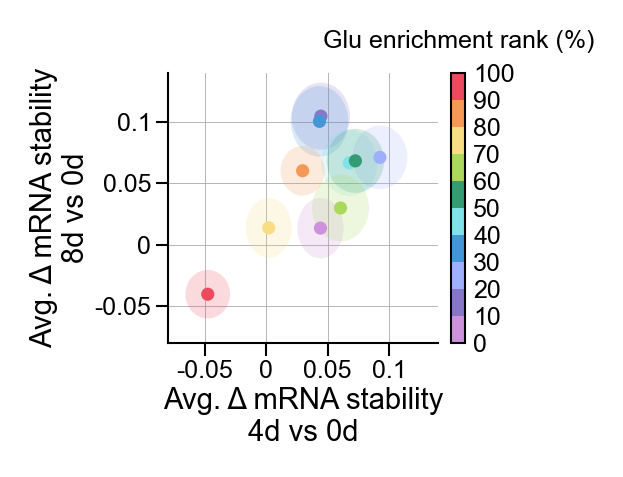

In [24]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [0.9]
height_ratios = [0.9]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

# Main
color_list = ['#ED4A5E','#F49A56','#F8DD84','#A9D85D','#359B73','#80E1E8','#4397D6','#9EB0FB','#8777C9','#CE92DD']
cmap = colors.ListedColormap(color_list)
sct = ax.scatter(D4_avgdS, D8_avgdS,
                # s=(np.array(range(1,11))*0.7+2)**2, 
                s=10,
                c=[*range(1,11)][::-1], cmap=cmap,
                vmin = 0.5, vmax = 10.5,
                lw=0, edgecolors='k',
                zorder=3)
for xcenter,ycenter,width,height,color in zip(D4_avgdS, D8_avgdS, D4_avgdS_SEM, D8_avgdS_SEM, color_list[::-1]):
    e1 = mpl.patches.Ellipse((xcenter, ycenter), width*2, height*2, 
                             fill=True, color=color, alpha=0.2,
                             linewidth=0, 
                             zorder=1)
    ax.add_patch(e1)
# ax.errorbar(D4_avgdS, D8_avgdS, 
#             xerr=D4_avgdS_SEM, yerr=D8_avgdS_SEM, 
#             fmt="none", color="k", lw=0.3,
#             capsize=1, capthick=0.3)

ax.set_xlim(-0.08, 0.14)
ax.set_ylim(-0.08, 0.14)
ax.set_xticks([-0.05, 0, 0.05, 0.1])
ax.set_yticks([-0.05, 0, 0.05, 0.1])
ax.set_xticklabels([-0.05, 0, 0.05, 0.1])
ax.set_yticklabels([-0.05, 0, 0.05, 0.1])
ax.tick_params(length=3, width=0.5, pad=1)
ax.grid(linestyle='-', c='#AAAAAA', lw=0.2)

ax.set_xlabel('Avg. \u0394 mRNA stability\n4d vs 0d', labelpad=1)
ax.set_ylabel('Avg. \u0394 mRNA stability\n8d vs 0d', labelpad=1)

# ax.set_facecolor('#E7E8E9')
# ax.grid(linestyle='-', c='#FFFFFF', lw=1)
# ax.grid(linestyle='-', c='#000000', lw=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


cbar_size = [1.05, 0, 0.05, 1]
cbar = plt.colorbar(sct, cax = fig.add_axes(cbar_size), orientation='vertical')
cbar.ax.set_title('Glu enrichment rank (%)', fontsize=6, ha='center', rotation=0)
# cbar.set_ticks([*range(1, 11)])
cbar.set_ticks(np.array(range(1,12,1))-0.5)
cbar.set_ticklabels(list(np.array(range(11))*10)[::-1])
cbar.ax.tick_params(labelsize=6, length=0, width=0.5, pad=2)  
cbar.ax.invert_yaxis()

plt.savefig('delta_mRNA_stability_scatter.pdf', bbox_inches='tight')
plt.show()
plt.close()